# 1. Using the data provided in Bronchitis.csv generate a Linear Model, evaluate the model, and provide the evidence of the appropriateness of the model. The aim of the study was to define if the probability of having Bronchitis is influenced by smoking and/or pollution. The data are stored contains information on 212 participants.

In [4]:
library(ggplot2)

loading library

In [6]:
data <- read.csv('Bronchitis.csv')

read csv file and then print out sample of data to see if its read correctly

In [9]:
head(data)

,bron,cigs,poll
,<int>,<dbl>,<dbl>
1,0,5.15,67.1
2,1,0.00,66.9
3,0,2.50,66.7
4,0,1.75,65.8
5,0,6.75,64.4
6,0,0.00,64.4


In [11]:
total_counts_of_bron <- table(data$bron)

In [13]:
cat("Total count of non-bronchitis cases", total_counts_of_bron[1], "\n")
cat("Total count of bronchitis cases:", total_counts_of_bron[2], "\n")

Total count of non-bronchitis cases 166 
Total count of bronchitis cases: 46 


I just wanted to see the total count of cases for bronchitis so I can just better understand the data that I was given. 

In [16]:
model <- glm(bron ~ cigs + poll, data = data, family = binomial)

Using GLM function which is generalized linear model with family as binomial since output is true or false on bronchitis. Cigs and Polls are the explanatory variables

In [19]:
summary(model)


Call:
glm(formula = bron ~ cigs + poll, family = binomial, data = data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.08491    2.95100  -3.417 0.000632 ***
cigs          0.21169    0.03813   5.552 2.83e-08 ***
poll          0.13176    0.04895   2.692 0.007113 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 221.78  on 211  degrees of freedom
Residual deviance: 174.21  on 209  degrees of freedom
AIC: 180.21

Number of Fisher Scoring iterations: 5


# Summary
Cigs and Pollution are highly significant since p value is either (p < 0.001 or p < .01). 

Cigs and poll have estimate that shows that every cig smokes per day, the log-odds of having bronchitis increases by .21169. Pollution is .1376. 

Residual deviance being lower than null deviance shows that cig and polls fit the data between than the model just being null. 

Based on everything Cigs and Poll are significant predictors of bronchitis

I am not doing a fit reduced model since both my predictor variables are significant. 

In [23]:
predicted_probabilities_bron <- predict(model, type = "response")

This will be predicted true or false for bronchitis. Its already trained in the output of true and false for bronchitis so this new line of code is going to make predictions on the data again and attempt to get the bron now without seeing it in the data.

In [26]:
threshold <- 0.5
predicted_classes <- ifelse(predicted_probabilities_bron > threshold, 1, 0)


Every row is checked and giving a probability percentage and if its above or equal to 50 percent its true and if below its false. Predicted classes grabs from data already established and creates into another data.  

In [29]:
conf_matrix <- table(Predicted = predicted_classes, Actual = data$bron)
print(conf_matrix)


         Actual
Predicted   0   1
        0 156  32
        1  10  14


This will check my prediction dataset with actual dataset.  Checking true and false on both for comparison. Displayed is true negatives, true negatives, false positive and false negative. Output here shows 156 true negatives and 14 true positives. 170 correct predictions and 42 wrong predictions. 

In [32]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Accuracy percentage:", accuracy))

[1] "Accuracy percentage: 0.80188679245283"


170 / 210 = .80188  - 80 percent is a good percentage, however, more than half of true statements are false postives which dont seem good to me. 

In [47]:
install.packages("lattice")
install.packages("caret")


The downloaded binary packages are in
	/var/folders/rd/jfxc79756t9g0g5f4ytyb6l40000gn/T//RtmpYbrr7l/downloaded_packages

The downloaded binary packages are in
	/var/folders/rd/jfxc79756t9g0g5f4ytyb6l40000gn/T//RtmpYbrr7l/downloaded_packages


In [50]:
library(lattice)
library(caret)


In [52]:
confusion_matrix <- confusionMatrix(as.factor(predicted_classes), as.factor(data$bron))
print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 156  32
         1  10  14
                                          
               Accuracy : 0.8019          
                 95% CI : (0.7418, 0.8533)
    No Information Rate : 0.783           
    P-Value [Acc > NIR] : 0.283466        
                                          
                  Kappa : 0.2951          
                                          
 Mcnemar's Test P-Value : 0.001194        
                                          
            Sensitivity : 0.9398          
            Specificity : 0.3043          
         Pos Pred Value : 0.8298          
         Neg Pred Value : 0.5833          
             Prevalence : 0.7830          
         Detection Rate : 0.7358          
   Detection Prevalence : 0.8868          
      Balanced Accuracy : 0.6221          
                                          
       'Positive' Class : 0               
                              

95% Confidence rate is between 74 percent to 85 percent. My model is 80.19% and No information Rate is 78 percent. Which means model is slighty higher than NIR. NIR is going to predict only non bron cases. Model is slighty better 

Mcnemar's Test P-Value : 0.001194  False positive is 10 and false negative is 32 which means that their is a high imbalance between between false positives and false negatives. 

P - Value = .2834. Since this is higher than .05. I reject that my models accuracy is better than NIR.  

 Kappa : 0.2951 = this is fair aggreement between models predictions are the actual claffications. Which means that our model is slightly better than chance.
 
 
'Positive' Class : 0 = No Bron

Sensitivity being .9398 means my model is very good at measuring the proportion of no bronchities cases which were correctly identified as not having bronchitis. 

Specificity being .3043 means my model is not good at identifying patients that do have bronchitis. 

positive predictions of no bron cases is .8298 and negative prediction is .5833. Appears my model is better at predicted no bron and is barely over 50 percent at predicting cases where their is bronchitis. This shows that my model is good at predicting no bron and not very good at bron. 

Prevalence : 0.7830          
Detection Rate : 0.7358          
Detection Prevalence : 0.8868          
Balanced Accuracy : 0.6221   

78 percent of my cases are no bron. 73 percent of my data predicted was in fact no bron. 88 precent of my cases were predicted as no bron.  

62 percent of balanced accuracy. This takes  Sensitivity : 0.9398 and Specificity : 0.3043 and divides this by 2. so it predicts 62 percent of true postive and negative cases of no bron. 

# 2. 25 students aspiring to enter to Computer Science have been evaluated on 5 different subjects: Differential Geometry (DifGeo), Complex Analysis (CompAn), Algebra (Alg), Real Analysis (RealAn) and Statistics (Stat).

These were the obtained scores:
ID DifGeo CompAn Alg RealAn Stat
ST-01 36 58 43 36 37
ST-02 62 54 50 46 52
ST-03 31 42 41 40 29
ST-04 76 78 69 66 81
ST-05 46 56 52 56 40
ST-06 12 42 38 38 28
ST-07 39 46 51 54 41
ST-08 30 51 54 52 32
ST-09 22 32 43 28 22
ST-10 9 40 47 30 24
ST-11 32 49 54 37 52
ST-12 40 62 51 40 49
ST-13 64 75 70 66 63
ST-14 36 38 58 62 62
ST-15 24 46 44 55 49
ST-16 50 50 54 52 51
ST-17 42 42 52 38 50
ST-18 2 35 32 22 16
ST-19 56 53 42 40 32
ST-20 59 72 70 66 62
ST-21 28 50 50 42 63
ST-22 19 46 49 40 30
ST-23 36 56 56 54 52
ST-24 54 57 59 62 58
ST-25 14 35 38 29 20

The objective of this study is to obtain a global ranking of students for entry into the Computer
Science, through a global score, extracted as a certain linear combination of grades in the five
subjects tested. Use PCA to obtain that global score, sort the candidates and generate a formula to
evaluate future candidates. 

In [81]:
install.packages("psych")
install.packages("devtools")
install.packages("GPArotation")
install.packages("ggbiplot")



The downloaded binary packages are in
	/var/folders/rd/jfxc79756t9g0g5f4ytyb6l40000gn/T//RtmpYbrr7l/downloaded_packages


also installing the dependencies ‘credentials’, ‘zip’, ‘gitcreds’, ‘ini’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘diffobj’, ‘gert’, ‘gh’, ‘whisker’, ‘shiny’, ‘downlit’, ‘httr2’, ‘htmlwidgets’, ‘xopen’, ‘brio’, ‘praise’, ‘waldo’, ‘usethis’, ‘ellipsis’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘rcmdcheck’, ‘rversions’, ‘sessioninfo’, ‘testthat’, ‘urlchecker’





The downloaded binary packages are in
	/var/folders/rd/jfxc79756t9g0g5f4ytyb6l40000gn/T//RtmpYbrr7l/downloaded_packages

The downloaded binary packages are in
	/var/folders/rd/jfxc79756t9g0g5f4ytyb6l40000gn/T//RtmpYbrr7l/downloaded_packages

The downloaded binary packages are in
	/var/folders/rd/jfxc79756t9g0g5f4ytyb6l40000gn/T//RtmpYbrr7l/downloaded_packages


In [82]:
library(psych)

In [83]:
library(GPArotation)
library(devtools)
library(ggbiplot)

Loading required package: usethis


Attaching package: ‘ggbiplot’


The following object is masked from ‘package:psych’:

    reflect




In [86]:
student_data <-read.csv('Student_scores.csv')

In [88]:
print(student_data)

      ID DifGeo CompAn Alg RealAn Stat
1  ST-01     36     58  43     36   37
2  ST-02     62     54  50     46   52
3  ST-03     31     42  41     40   29
4  ST-04     76     78  69     66   81
5  ST-05     46     56  52     56   40
6  ST-06     12     42  38     38   28
7  ST-07     39     46  51     54   41
8  ST-08     30     51  54     52   32
9  ST-09     22     32  43     28   22
10 ST-10      9     40  47     30   24
11 ST-11     32     49  54     37   52
12 ST-12     40     62  51     40   49
13 ST-13     64     75  70     66   63
14 ST-14     36     38  58     62   62
15 ST-15     24     46  44     55   49
16 ST-16     50     50  54     52   51
17 ST-17     42     42  52     38   50
18 ST-18      2     35  32     22   16
19 ST-19     56     53  42     40   32
20 ST-20     59     72  70     66   62
21 ST-21     28     50  50     42   63
22 ST-22     19     46  49     40   30
23 ST-23     36     56  56     54   52
24 ST-24     54     57  59     62   58
25 ST-25     14     35  3

I copied professors data and made it into a csv file. I printed the csv file to make sure that the data matched exactly with what he gave me in project.

The objective of this study is to obtain a global ranking of students for entry into the Computer
Science, through a global score, extracted as a certain linear combination of grades in the five
subjects tested. Use PCA to obtain that global score, sort the candidates and generate a formula to
evaluate future candidates. 

In [95]:
scaled_data <- scale(student_data[, 2:6])

In [97]:
print(scaled_data)

           DifGeo      CompAn         Alg       RealAn       Stat
 [1,] -0.04069508  0.61295337 -0.78632522 -0.777019343 -0.4118062
 [2,]  1.35150518  0.28162722 -0.06962255 -0.003095695  0.4965898
 [3,] -0.30842590 -0.71235122 -0.99109742 -0.467449884 -0.8962841
 [4,]  2.10115148  2.26958410  1.87571330  1.544751602  2.2528222
 [5,]  0.49476656  0.44729030  0.13514965  0.770827954 -0.2301270
 [6,] -1.32580302 -0.71235122 -1.29825571 -0.622234613 -0.9568438
 [7,]  0.11994341 -0.38102507  0.03276355  0.616043224 -0.1695673
 [8,] -0.36197207  0.03313261  0.33992184  0.461258494 -0.7146049
 [9,] -0.79034138 -1.54066658 -0.78632522 -1.396158262 -1.3202023
[10,] -1.48644151 -0.87801429 -0.37678084 -1.241373532 -1.1990828
[11,] -0.25487974 -0.13253046  0.33992184 -0.699626978  0.4965898
[12,]  0.17348957  0.94427952  0.03276355 -0.467449884  0.3149106
[13,]  1.45859751  2.02108949  1.97809939  1.544751602  1.1627469
[14,] -0.04069508 -1.04367736  0.74946623  1.235182143  1.1021872
[15,] -0.6

scaled center is mean scores of each subject and scaled scale is standard deviation of each subject. scaled each variable with its number minus mean divided by standard deviation for this output. 

Parallel analysis suggests that the number of factors =  NA  and the number of components =  1 


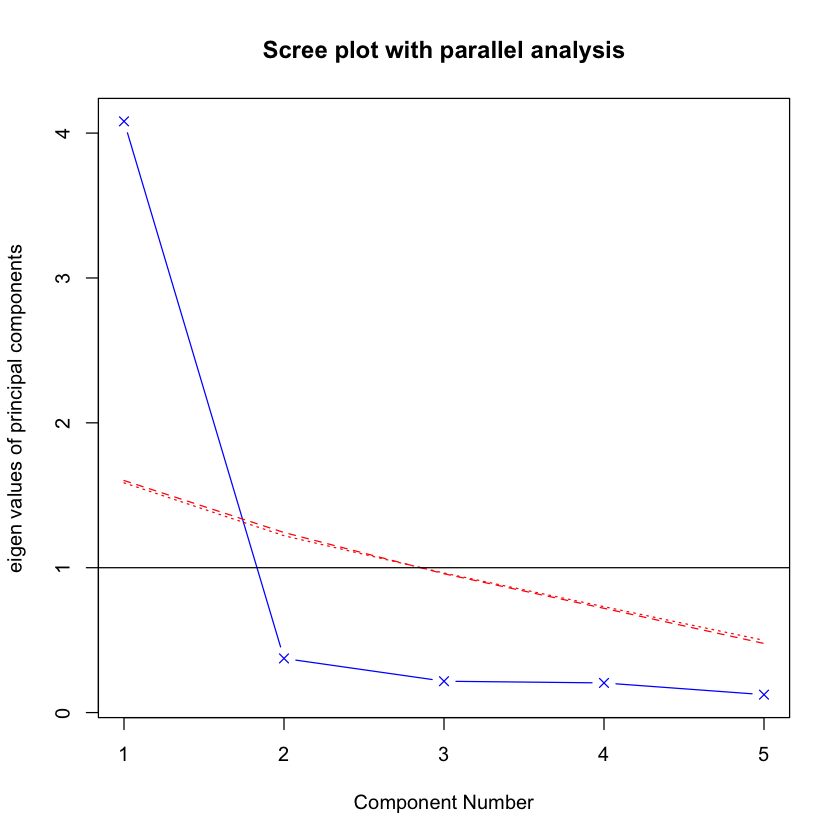

In [125]:
fa.parallel(scaled_data, fa="pc", n.iter=100,
show.legend=FALSE, main="Scree plot with parallel analysis")

based on this output we can have 1 pca that has all variables inside of it

In [128]:
pc <- principal(scaled_data, nfactors = 1, rotate = "none", scores = TRUE)


In [130]:
print(pc)

Principal Components Analysis
Call: principal(r = scaled_data, nfactors = 1, rotate = "none", scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
        PC1   h2   u2 com
DifGeo 0.90 0.80 0.20   1
CompAn 0.88 0.78 0.22   1
Alg    0.93 0.87 0.13   1
RealAn 0.90 0.81 0.19   1
Stat   0.91 0.82 0.18   1

                PC1
SS loadings    4.08
Proportion Var 0.82

Mean item complexity =  1
Test of the hypothesis that 1 component is sufficient.

The root mean square of the residuals (RMSR) is  0.06 
 with the empirical chi square  1.76  with prob <  0.88 

Fit based upon off diagonal values = 0.99

For all 5 subjects their is a low of 88$ to max 93% of variance explained by PC1. All variables have high loadings on PC1 and a large majority of variable is captured. This is really good

Each subject has its variance explained with low of 78(CompAn) and high of 87(Alg). PC1 is able to explain a higher percentage of variance for each subject. U2 is uniqueness which cannot be explained by PC1. U2 is between 12 to 22 which is low compared to H2. 



Proportion Var 0.82 - This shows that PC1 can explain 82 % of the total variance in the data which is very good. For mean item complexity being 1 means 1 PC variable is all that is needed to explain the data variance

P-value at .88 means ensures that all we need is one component. For .99 means that the fit is very well for our model. 

In [141]:
student_scores_final <- pc$scores
student_scores_dataframe <- data.frame(ID = student_data$ID, Score = student_scores_final)
print(student_scores_dataframe)

      ID         PC1
1  ST-01 -0.31879609
2  ST-02  0.45137096
3  ST-03 -0.75039772
4  ST-04  2.22142461
5  ST-05  0.35462102
6  ST-06 -1.09146683
7  ST-07  0.04933900
8  ST-08 -0.05200547
9  ST-09 -1.28703540
10 ST-10 -1.14201585
11 ST-11 -0.05041742
12 ST-12  0.21679834
13 ST-13  1.80765851
14 ST-14  0.45378434
15 ST-15 -0.16602559
16 ST-16  0.42106246
17 ST-17 -0.11489416
18 ST-18 -1.90885876
19 ST-19 -0.19583666
20 ST-20  1.68171966
21 ST-21  0.06015555
22 ST-22 -0.61913997
23 ST-23  0.45825051
24 ST-24  0.97499632
25 ST-25 -1.45429134


This grabs the pc scores and places a formula that will get each student individual total score. Then the score is placed in a dataframe and outputed so we can see it. 

# Formula for future students
(DifGeo): 0.90
(CompAn): 0.88
(Alg): 0.93
(RealAn): 0.90
(Stat): 0.91
PCA Results above

Standardize the scores of initial variables from students to get second part of formula which is for example Z DifGeo etc. 
PCA Score for students =0.90⋅Z DifGeo +0.88⋅Z CompAn +0.93⋅Z Alg +0.90⋅Z RealAn +0.91⋅Z Stat

In [150]:
ranked_students_final <- student_scores_dataframe[order(-student_scores_dataframe$PC1),]
print(ranked_students_final)

      ID         PC1
4  ST-04  2.22142461
13 ST-13  1.80765851
20 ST-20  1.68171966
24 ST-24  0.97499632
23 ST-23  0.45825051
14 ST-14  0.45378434
2  ST-02  0.45137096
16 ST-16  0.42106246
5  ST-05  0.35462102
12 ST-12  0.21679834
21 ST-21  0.06015555
7  ST-07  0.04933900
11 ST-11 -0.05041742
8  ST-08 -0.05200547
17 ST-17 -0.11489416
15 ST-15 -0.16602559
19 ST-19 -0.19583666
1  ST-01 -0.31879609
22 ST-22 -0.61913997
3  ST-03 -0.75039772
6  ST-06 -1.09146683
10 ST-10 -1.14201585
9  ST-09 -1.28703540
25 ST-25 -1.45429134
18 ST-18 -1.90885876


Students are now ranked and student 4 and 13 are top students. The higher the score the higher the rank of the student is. You do the formula above to get each individual student score and then you rank them by highest to lowest.

 # 3.
 The following sample of a random vector (X, Y) has been obtained: (-3,7), (1,4), (0,6), (3,5),
(1,9), (7,7), (6,9), (8,10), (7,12), (10,11).
a. Perform a principal component analysis and a Regression on this sample.
b. Represent a scatter plot, together with the first principal component and the regression
line.

In [155]:
vector_data <- data.frame(
    X = c(-3, 1, 0, 3, 1, 7, 6, 8, 7, 10),
  Y = c(7, 4, 6, 5, 9, 7, 9, 10, 12, 11)
)
print(vector_data)

    X  Y
1  -3  7
2   1  4
3   0  6
4   3  5
5   1  9
6   7  7
7   6  9
8   8 10
9   7 12
10 10 11


instead of creating csv like other data in other two questions, here i just put the data in a dataframe called vector_data and I print output to make sure it matches professors data. 

In [161]:
pca <- prcomp(vector_data, scale. = TRUE)
summary(pca)
print(pca)

Importance of components:
                          PC1    PC2
Standard deviation     1.2832 0.5944
Proportion of Variance 0.8233 0.1767
Cumulative Proportion  0.8233 1.0000

Standard deviations (1, .., p=2):
[1] 1.2832107 0.5944497

Rotation (n x k) = (2 x 2):
        PC1        PC2
X 0.7071068 -0.7071068
Y 0.7071068  0.7071068


Standard deviation of PC1 indicates to me that more varaince is captured compared to PC2. 

PC1 accounts for 82.33% of the variance in the data while PC2 captures the rest of the data which is 17.67%. Both together equal 100.

Rotation (n x k) = (2 x 2):
        PC1        PC2
X 0.7071068 -0.7071068
Y 0.7071068  0.7071068

This will be for the visual of our data points. The variables in original dataframe will be scaled and then with PC1(X,Y) and PC2(X,Y) shown in rotation above will use a formula to output data to visualize.

# Formula
PC1 = 0.7071 * 𝑋 + 0.7071 * 𝑌
PC2 = -0.7071 * 𝑋 + 0.7071 * 𝑌

X and Y are scaled from original dataset variables.
 


In [167]:
reg_model <- lm(Y ~ X, data = vector_data)
summary(reg_model)


Call:
lm(formula = Y ~ X, data = vector_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7848 -1.7563  0.2848  1.5190  2.7848 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.3797     0.9527   6.697 0.000153 ***
X             0.4051     0.1689   2.398 0.043335 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.124 on 8 degrees of freedom
Multiple R-squared:  0.4181,	Adjusted R-squared:  0.3454 
F-statistic: 5.749 on 1 and 8 DF,  p-value: 0.04333


Doing regression formula on y onto x. Y is dependent variable and X is independent variable. 

Intercept is highly significant to Y. X has moderate significance to Y. Both based on p-values. Null hypothesis cant be rejected on both since their is evidence of significance.

8 degrees of freedom which is small. Error is at 2.124. 41.81 percent of variance in Y can be explained by model. Adjusted R-squared is even lower. 

The p-value of .04333 is less than .05 which shows the model is decent fit. 

    X  Y        PC1         PC2
1  -3  7 -1.4507502  0.91193434
2   1  4 -1.5839214 -0.57134226
3   0  6 -1.2138686  0.13623683
4   3  5 -0.9769870 -0.63946067
5   1  9 -0.2368816  0.77569751
6   7  7  0.2368816 -0.77569751
7   6  9  0.6069343 -0.06811842
8   8 10  1.2138686 -0.13623683
9   7 12  1.5839214  0.57134226
10 10 11  1.8208030 -0.20435525


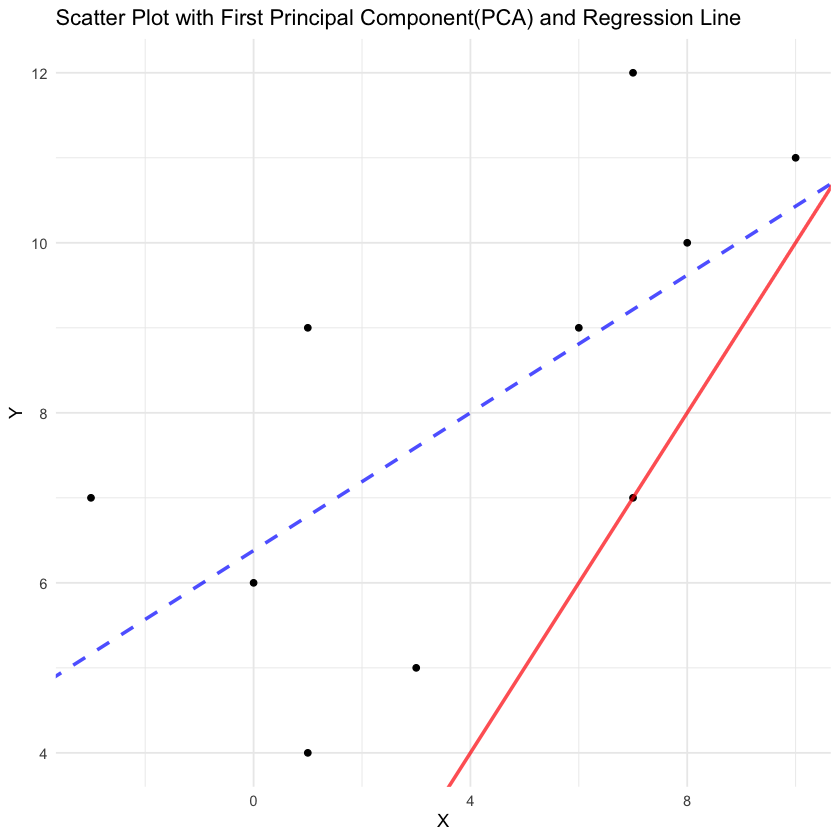

In [177]:

ggplot(vector_data, aes(x = X, y = Y)) +
  geom_point() +
  geom_abline(intercept = reg_model$coefficients[1], slope = reg_model$coefficients[2], color = "blue", linetype = "dashed", linewidth = 1, alpha = 0.7) +
  geom_abline(intercept = 0, slope = pca$rotation[2,1] / pca$rotation[1,1], color = "red", linewidth = 1, alpha = 0.7) +
  labs(title = "Scatter Plot with First Principal Component(PCA) and Regression Line",
       x = "X",
       y = "Y") +
  theme_minimal()

vector_data$PC1 <- pca$x[,1]
vector_data$PC2 <- pca$x[,2]
print(vector_data)

Blue line is regression line which is fitted to minimize predicition erros for Y based on X . Red line which is PC1 captures morst of all the variance in combining X and Y. Regressions line appears to be more stable but its off since variance is very different. However, PC1 line is similiar but their more similiar variance at very top. 